In [1]:
library(CBCgrps)
library(nortest)
library(RPostgreSQL)
library(twang)
library(Matching)
library(tidyverse)
library(ggplot2)
library(readxl)
library(tableone)

Loading required package: nortest

Warning message:
"package 'RPostgreSQL' was built under R version 4.3.3"
Loading required package: DBI

Warning message:
"package 'twang' was built under R version 4.3.3"
Warning message in .recacheSubclasses(def@className, def, env):
"undefined subclass "ndiMatrix" of class "replValueSp"; definition not updated"
To reproduce results from prior versions of the twang package, please see the version="legacy" option described in the documentation.

Warning message:
"package 'Matching' was built under R version 4.3.3"
Loading required package: MASS

## 
##  Matching (Version 4.10-14, Build Date: 2023-09-13)
##  See https://www.jsekhon.com for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##


Warning message:
"package 'tidyverse' was built un

In [2]:
data_dir <- file.path("..", "data")

In [3]:
data <- read_excel(file.path(data_dir, "baseline.xlsx"))

## 以下是对baseline进行ps_match

In [4]:
baseline <- as.data.frame(data)

In [5]:
fml <- "TCM ~ serum + IBM + 
      AKI + PT + APTT  + dose +
       fib + DD + PLT + CK + CKMB + Tn"

In [9]:
echo_ps_ate <- ps(as.formula(fml),
                  data = baseline,
                  interaction.depth = 2,
                  shrinkage = 0.01,
                  perm.test.iters = 0,
                  estimand = "ATE",
                  verbose = FALSE,
                  stop.method = c("es.mean", "es.max", "ks.mean", "ks.max"),
                  n.trees = 10000,
                  train.fraction = 0.8,
                  version = "legacy",
                  cv.folds = 3,
                  n.cores = 8)

In [10]:
ft_importance <- summary(echo_ps_ate$gbm.obj,
                         n.trees = echo_ps_ate$desc$es.mean.ATE$n.trees,
                         plot = FALSE)
ft_importance 

,var,rel.inf
,<chr>,<dbl>
PLT,PLT,20.3795818
CK,CK,19.0834911
APTT,APTT,13.8053641
PT,PT,11.8304843
CKMB,CKMB,10.4612085
IBM,IBM,8.0044056
fib,fib,5.1998910
DD,DD,4.1983960
dose,dose,2.6234186


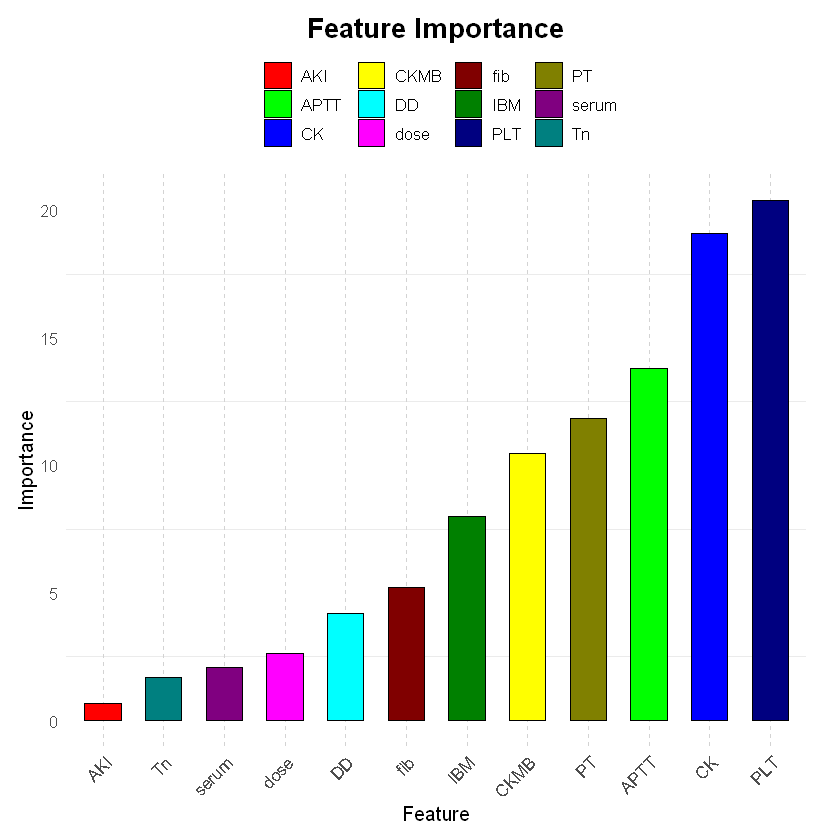

In [11]:
colors <- c("#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#800000", "#008000", "#000080", "#808000", "#800080", "#008080", "#C0C0C0", "#808080")

# 绘制特征重要性条形图
ggplot(data = ft_importance, aes(x = reorder(var, rel.inf), y = rel.inf, fill = var)) +
  geom_bar(stat = "identity", width = 0.6, color = "black") +
  scale_fill_manual(values = colors) +
  labs(x = "Feature", y = "Importance", title = "Feature Importance") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.title = element_blank(),
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.text = element_text(size = 10),
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    panel.grid.major.x = element_line(color = "lightgray", linetype = "dashed"),
    plot.margin = margin(10, 20, 10, 10)
  )

In [6]:
subgroup2 <- as.data.frame(readxl::read_excel(file.path(data_dir, "subgroup2.xlsx")))

In [7]:
fml2 <- "TCM ~ serum + IBM + 
      AKI + PT + APTT  +
       fib + DD + PLT + CK + CKMB + Tn"

In [173]:
echo_ps_ate <- ps(as.formula(fml2),
                  data = subgroup2,
                  interaction.depth = 2,
                  shrinkage = 0.01,
                  perm.test.iters = 0,
                  estimand = "ATE",
                  verbose = FALSE,
                  stop.method = c("es.mean", "es.max", "ks.mean", "ks.max"),
                  n.trees = 10000,
                  train.fraction = 0.8,
                  version = "legacy",
                  cv.folds = 3,
                  n.cores = 8)

In [174]:
ft_importance <- summary(echo_ps_ate$gbm.obj,
                         n.trees = echo_ps_ate$desc$es.mean.ATE$n.trees,
                         plot = FALSE)

In [175]:
ft_importance 

,var,rel.inf
,<chr>,<dbl>
CKMB,CKMB,20.019479
CK,CK,18.130670
PT,PT,16.064856
APTT,APTT,12.974043
fib,fib,7.788067
DD,DD,7.431820
PLT,PLT,7.424444
IBM,IBM,5.754375
AKI,AKI,2.353567


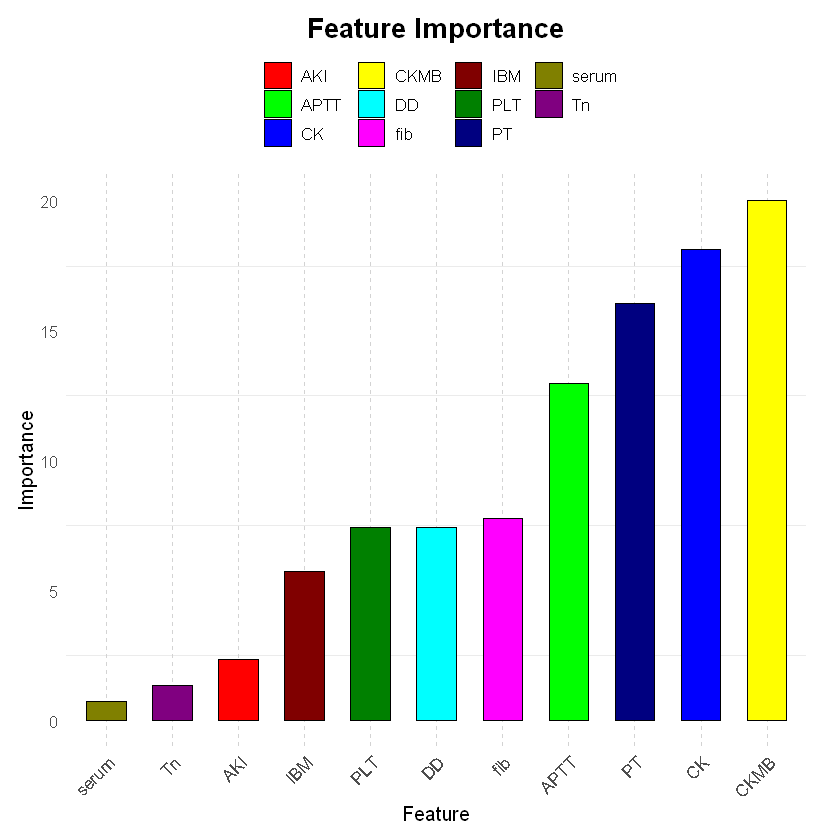

In [176]:
colors <- c("#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#800000", "#008000", "#000080", "#808000", "#800080", "#008080", "#C0C0C0", "#808080")

# 绘制特征重要性条形图
ggplot(data = ft_importance, aes(x = reorder(var, rel.inf), y = rel.inf, fill = var)) +
  geom_bar(stat = "identity", width = 0.6, color = "black") +
  scale_fill_manual(values = colors) +
  labs(x = "Feature", y = "Importance", title = "Feature Importance") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.title = element_blank(),
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.text = element_text(size = 10),
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    panel.grid.major.x = element_line(color = "lightgray", linetype = "dashed"),
    plot.margin = margin(10, 20, 10, 10)
  )

## 以下是第三次fiff的ps

In [8]:
subgroup3 <- as.data.frame(readxl::read_excel(file.path(data_dir, "subgroup3.xlsx")))

In [9]:
fml3 <- "TCM ~ serum + IBM + AKI + PT + APTT  + fib + DD + PLT + CK + CKMB + Tn"

In [9]:
echo_ps_ate <- ps(as.formula(fml3),
                  data = subgroup3,
                  interaction.depth = 2,
                  shrinkage = 0.01,
                  perm.test.iters = 0,
                  estimand = "ATE",
                  verbose = FALSE,
                  stop.method = c("es.mean", "es.max", "ks.mean", "ks.max"),
                  n.trees = 10000,
                  train.fraction = 0.8,
                  version = "legacy",
                  cv.folds = 3,
                  n.cores = 8)

In [10]:
ft_importance <- summary(echo_ps_ate$gbm.obj,
                         n.trees = echo_ps_ate$desc$es.mean.ATE$n.trees,
                         plot = FALSE)

ft_importance 

,var,rel.inf
,<chr>,<dbl>
PLT,PLT,26.6281923
DD,DD,15.6338143
CKMB,CKMB,13.5372025
fib,fib,12.1590200
PT,PT,10.1497418
CK,CK,6.9462983
APTT,APTT,6.3402048
serum,serum,4.2867917
IBM,IBM,3.4264364


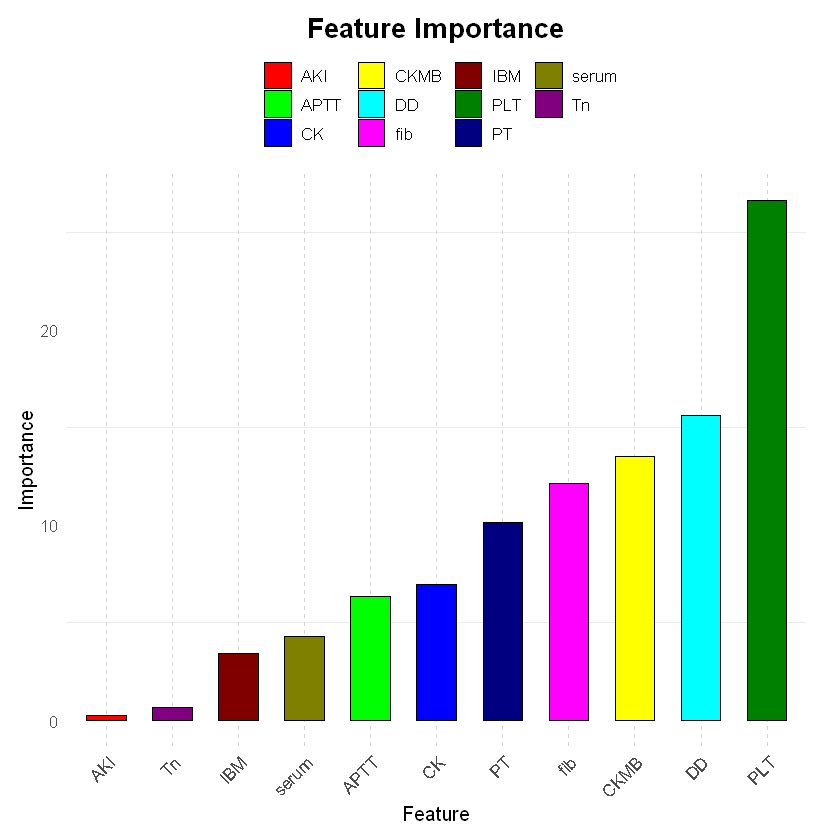

In [11]:
colors <- c("#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF", "#800000", "#008000", "#000080", "#808000", "#800080", "#008080", "#C0C0C0", "#808080")

# 绘制特征重要性条形图
ggplot(data = ft_importance, aes(x = reorder(var, rel.inf), y = rel.inf, fill = var)) +
  geom_bar(stat = "identity", width = 0.6, color = "black") +
  scale_fill_manual(values = colors) +
  labs(x = "Feature", y = "Importance", title = "Feature Importance") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.title = element_blank(),
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.text = element_text(size = 10),
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    panel.grid.major.x = element_line(color = "lightgray", linetype = "dashed"),
    plot.margin = margin(10, 20, 10, 10)
  )